## Table of content

1. Introduction
2. Goal
3. Import Datset & libraries
4. Overview
5. EDA
6. Data Pre-processing
7. Splitting
8. Modelling
9.  Oversampling
10. Conclusions
11. References

Data Preparation

● Characterisation of the data set: size; number of attributes; has/does not have missing values,
number of observations etc.[0-10]


● Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA (Exploratory
Data Analysis) visualizations (plural), including a clear and concise explanation of your rationale for
what you are doing with the data and why you are doing it.[0-20]


● Apply encoding, scaling and feature engineering as and if required, detailing how and why you used
these techniques and the rationale for your decisions.[0-30]


● Explore the possibility of using dimensional reduction on the dataset. Employ both LDA (Linear
Discriminant Analysis) and PCA (Principal Component Analysis) and compare the separation of
classes through visualization. Explain the difference between both techniques in your own words
and discuss in detail how your results may affect your analysis of classifying or clustering the normal
as compared to anomalous biddings.[0-40]

Introduction

What is Employee Attrition?

Employee attrition is a natural process where an employee leave the workforce. Some of them are unavoidables, such as retirement or involuntary, others can be voluntary, internal or demographic based. Attrition is an inevitable part of any business and it occurs when the workforce diminishes over time for personal or professional reasons of the employee. It is important also to mark the difference between the employee attrition and the turnover. Employee attrition create vacancies that are not immediately filled up, while turnover is a more short term metric and it can be addressed faster.

Goal

Import Datset & libraries

In [94]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('Employee_Attrition.csv')
df.shape

(1470, 35)

In [96]:
print("Our Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head())
display(df.dtypes.value_counts())

Our Dataset has 1470 rows and 35 columns


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


float64    26
object      9
Name: count, dtype: int64

Overview

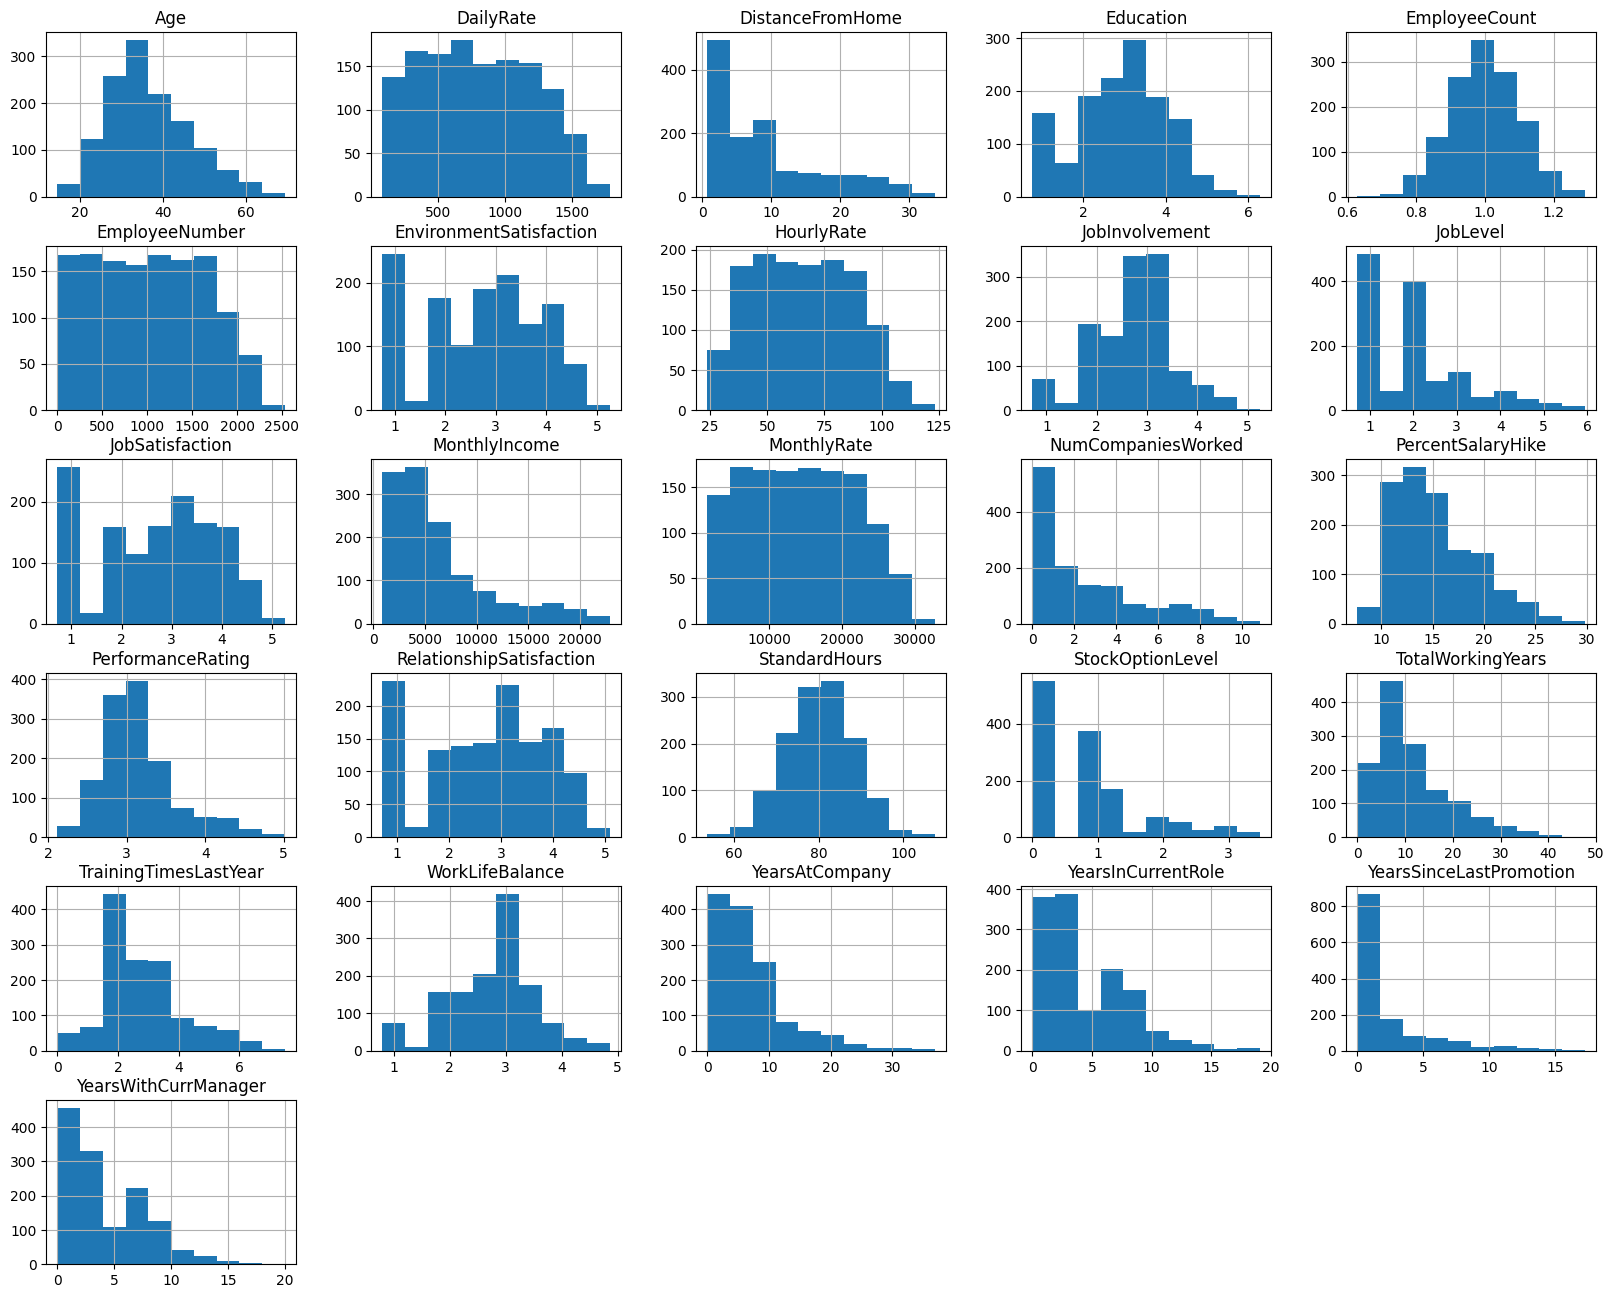

In [97]:
df.hist(figsize=(20, 16))
plt.show()

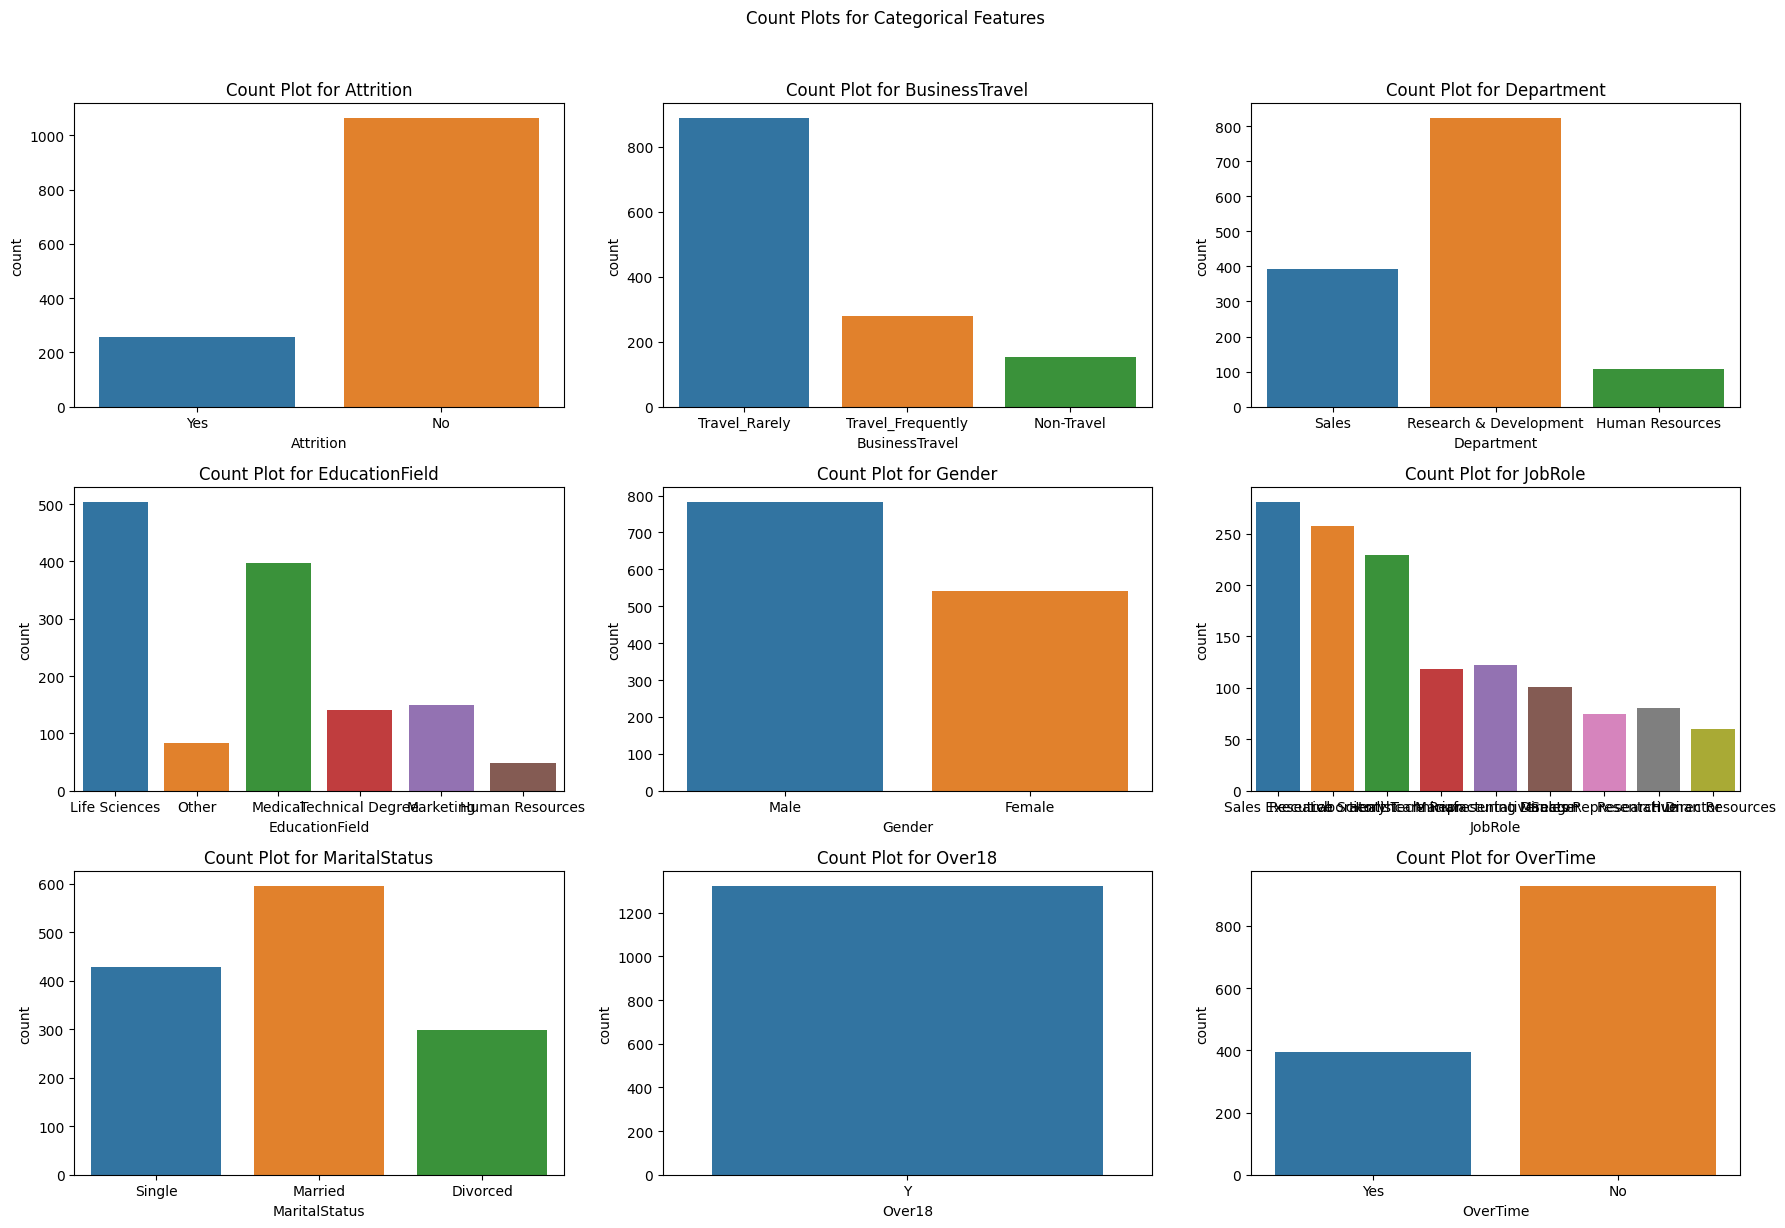

In [98]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(df.select_dtypes(include=['object']).columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=feature, data=df)
    plt.title(f'Count Plot for {feature}')

plt.suptitle('Count Plots for Categorical Features', y=1.02)
plt.tight_layout()
plt.show()

age ND
attrition Y or N (147missing)

Let's take a look at missing values of our Dataset

In [99]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

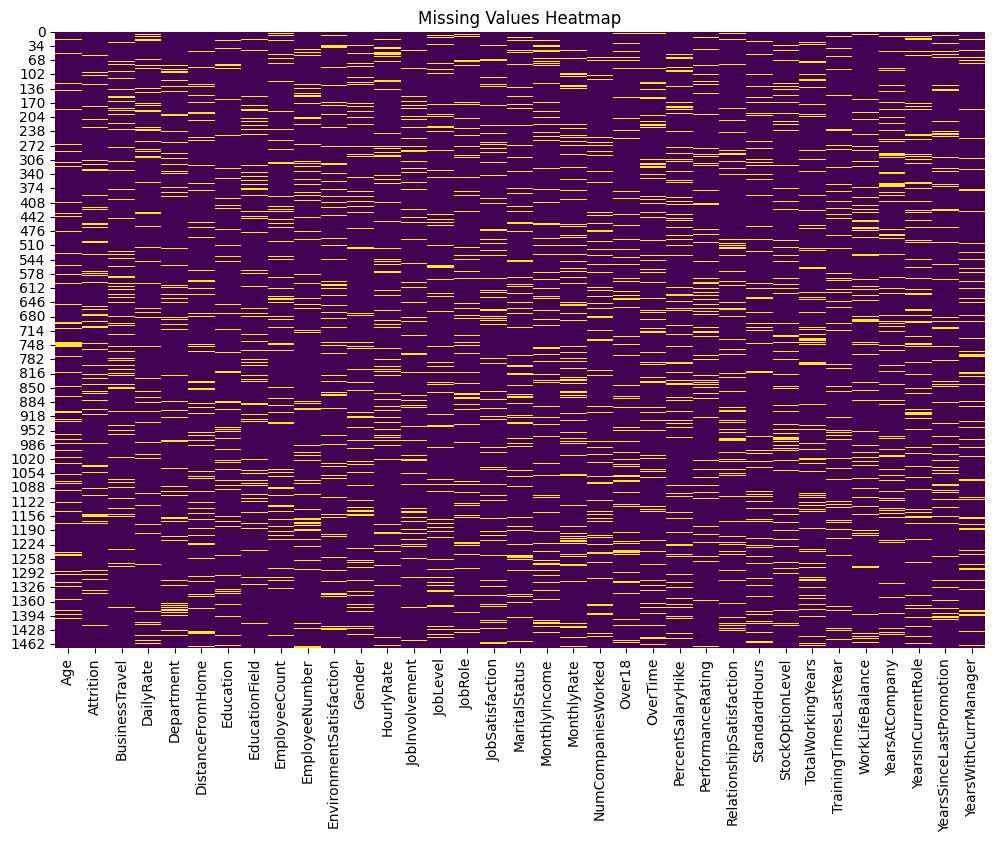

In [100]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Check for duplicated values

In [101]:
df.duplicated().sum() 

0

Our target variable

In [102]:
df["Attrition"].unique()

array(['Yes', 'No', nan], dtype=object)

In [103]:
df["Attrition"].value_counts()

Attrition
No     1065
Yes     258
Name: count, dtype: int64

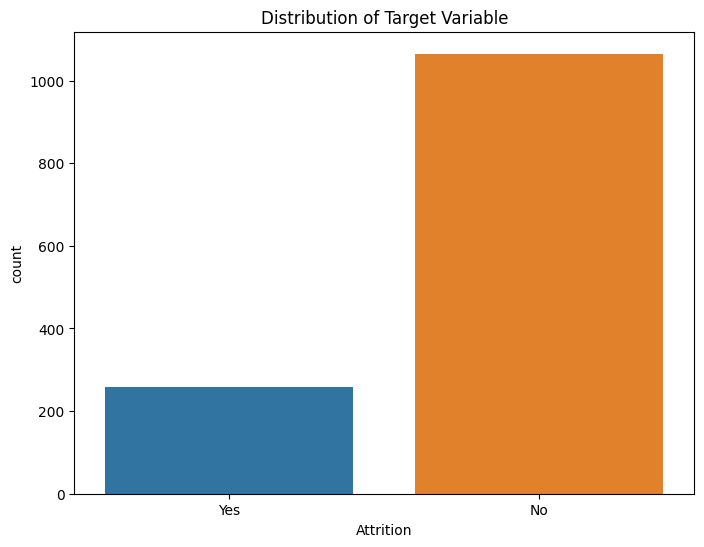

In [104]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Target Variable')
plt.show()

Our target variable looks very unbalanced. In the Machine Learning steps, we will run our chosen models with and without balance it

In [105]:
# from ydata_profiling import ProfileReport
# slice_df = df.iloc[:, :10]
# report = ProfileReport(df, title='My Data', minimal=True)
# report.to_file("First Attrition File.html")

EDA

Since Over18 has a constant value "YES", and missing values, let's create a bar plot which show us if the missing values have to be replaced or dropped

In [106]:
df['Over18'].fillna('UNKNOWN', inplace=True)

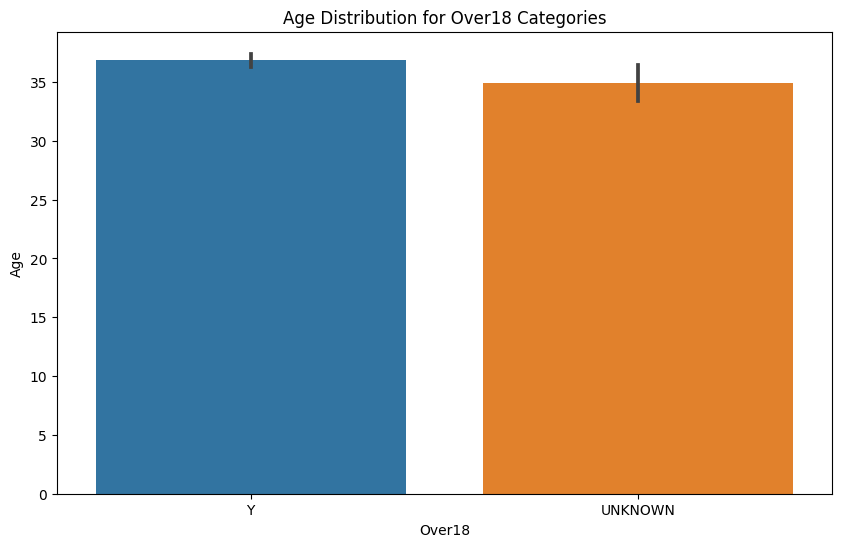

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Over18', y='Age', data=df)
plt.title('Age Distribution for Over18 Categories')
plt.xlabel('Over18')
plt.ylabel('Age')
plt.show()

If the corrisponding age is over or equal to 18 years old in "Over18" feature, we're going to replace the missing value with "Y"

In [108]:
df['Over18'].fillna('UNKNOWN', inplace=True)
df.loc[(df['Over18'] == 'UNKNOWN') & (df['Age'] >= 18), 'Over18'] = 'Y'
print(df['Over18'].value_counts())

Over18
Y          1456
UNKNOWN      14
Name: count, dtype: int64


In [109]:
unknown_age_records = df[df['Over18'] == 'UNKNOWN']
print(unknown_age_records[['Age', 'Over18']])

            Age   Over18
206   16.057972  UNKNOWN
609         NaN  UNKNOWN
705         NaN  UNKNOWN
717         NaN  UNKNOWN
746         NaN  UNKNOWN
870         NaN  UNKNOWN
1073        NaN  UNKNOWN
1089        NaN  UNKNOWN
1243        NaN  UNKNOWN
1248        NaN  UNKNOWN
1314        NaN  UNKNOWN
1382        NaN  UNKNOWN
1459        NaN  UNKNOWN
1468        NaN  UNKNOWN


Missing 'Over18' values are relatively small and these rows don't carry critical information for our analysis so we choose to drop them

In [110]:
df.dropna(subset=['Over18'], inplace=True)

age ND
attrition Y or N (147missing)


References:



https://statisticsbyjim.com/basics/assessing-normality-histograms-probability-plots/https://www.spiceworks.com/hr/engagement-retention/articles/what-is-attrition-complete-guide/#_001